# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2    
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_url_response = requests.get(btc_url).json()
btc_price = btc_url_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_url_response = requests.get(eth_url).json()
eth_price = eth_url_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39243.60
The current value of your 5.3 ETH is $10990.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG for the past 800 days
current_portfoilo = alpaca.get_barset(tickers, timeframe, end=today, limit=800).df
current_portfoilo = current_portfoilo.sort_index(ascending=False)

# Preview DataFrame
current_portfoilo.head(5)
#current_portfoilo.tail(5)

AGG                                        \
                              open      high      low   close     volume   
time                                                                       
2021-06-22 00:00:00-04:00  114.830  115.1400  114.830  115.11  5299846.0   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.96  4934966.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.29  5438261.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.99  7417691.0   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.63  7527672.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.70  415.01  92753385.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.32  421.97  71991686.0  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324.0

In [10]:
# Pick AGG and SPY close prices
agg_close_price = current_portfoilo["AGG"]["close"][0]
spy_close_price = current_portfoilo["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.11
Current SPY closing price: $423.06


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21153.00
The current value of your 200 AGG shares is $23022.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# calculate the total crypto and share values
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
savings = {"amount" : [total_crypto,total_shares]}
# Create dataframe df_savings
df_savings = pd.DataFrame(savings, index=["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,50234.528
shares,44175.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

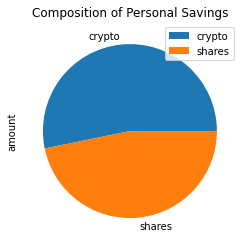

In [13]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

total_savings

# Validate saving health
if emergency_fund < total_savings:
        print(" Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print(" Congratulations! You have reached this financial goal")
else:
        print(f"Oh No! You are {emergency_fund - total_savings} dollars away from reaching the goal")

NameError: name 'total_sh' is not defined

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
display(tickers)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

['AGG', 'SPY']

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.21  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.09  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   
2021-01-13 00:00:00-05:00  117.63  117.6300  117.0800  117.36  5686592   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-01-07 00:00:00-05:00  376.10  379.90  375.9100  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466  
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805  
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896  
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76  38355050

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
montecarlo_30 = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [18]:
# Printing the simulation input data
montecarlo_30.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.21  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.09  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   
2021-01-13 00:00:00-05:00  117.63  117.6300  117.0800  117.36  5686592   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-01-07 00:00:00-05:00          NaN  376.10  379.90  375.9100  379.06   
2021-01-08 00:00:00-05:00    -0.001024  380.59  381.49  377.1000  381.24   
2021-01-11 00:00:00-05:00    -0.001708  377.85  380.58  377.7189  378.74   
2021-01-12 00:00:00-05:00     0.000770  378.89  379.86  376.3600  378.81   
2021-01-13 00:00:00-05:00     0.003248  378.69  380.86  377.8500  379.76   

                                                  
                             volume daily_return  
time                                              
2021-01-07 00:00:00-05:00  58862006          NaN  
2021-01-08 00:00:00-05:00  60275466     0.005751  
2021-01-11 00:00:00-05:00  44814805    -0.006558  
2021-01-12 00:00:00-05:00  45364896     0.000185  
2021-01-13 00:00:00-05:00  38355050     0.002508

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
m

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
montecarlo_30.calc_cumulative_return()

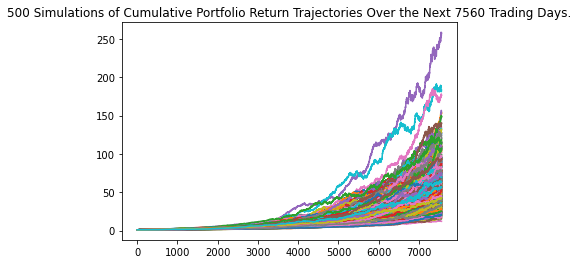

In [ ]:
# Plot simulation outcomes
montecarlo_30_plot = montecarlo_30.plot_simulation()

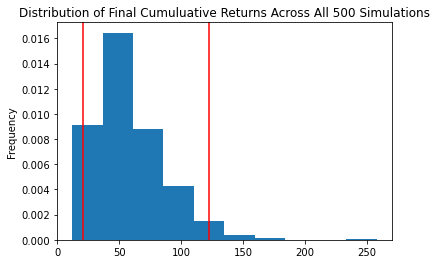

In [ ]:
# Plot probability distribution and confidence intervals
montecarlo_30_dist_plot = montecarlo_30.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
montecarlo_30_summary = montecarlo_30.summarize_cumulative_return()

# Print summary statistics
print(montecarlo_30_summary)

count           500.000000
mean             58.248993
std              28.752724
min              12.053724
25%              38.738522
50%              52.223942
75%              71.288142
max             257.684368
95% CI Lower     20.649107
95% CI Upper    122.426779
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((montecarlo_30_summary[8] * initial_investment), 2)
ci_upper = round((montecarlo_30_summary[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $412982.14 and $2448535.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((montecarlo_30_summary[8] * initial_investment), 2)
ci_upper = round((montecarlo_30_summary[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $619473.21 and $3672803.36


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")